# Practica#4: Prueba estadistica

## Pruebas de Hipótesis
Las pruebas de hipótesis son procedimientos que permiten evaluar afirmaciones sobre una población basándose en datos de muestra. Siguen un marco lógico que incluye:

Hipótesis Nula (𝐻0): Representa una afirmación inicial que se intenta refutar o desmentir. Por ejemplo, "No hay diferencia en las medias de dos grupos".
Hipótesis Alternativa (𝐻1): Lo contrario de 𝐻0; representa lo que el investigador desea probar. 
  Ejemplo: "Hay una diferencia en las medias de dos grupos".

Pasos en una prueba de hipótesis:

1) Definir las hipótesis: 𝐻0 y 𝐻1

2) Elegir una prueba estadística: Basada en el tipo de datos (nominales, ordinales, continuos) y el diseño del experimento.

3) Calcular el estadístico de prueba: Por ejemplo, t-estadístico para pruebas 𝑡, z-estadístico para pruebas z, entre otros.

4) Establecer un nivel de significancia (α): Generalmente, 𝛼=0.05

5) Decisión:


   -Rechazar 𝐻0: Si el valor 𝑝 (probabilidad de obtener resultados iguales o más extremos que los observados, dado que 𝐻0 es cierta) es menor que 𝛼.

   
    -No rechazar 𝐻0: Si p≥α.

Tipos de pruebas de hipótesis comunes:

1) Pruebas paramétricas: Requieren supuestos sobre la distribución de los datos (por ejemplo, pruebas t, ANOVA).
2) Pruebas no paramétricas: No requieren supuestos específicos sobre la distribución (por ejemplo, prueba de Wilcoxon, prueba U de Mann-Whitney).

## Pruebas de Significancia
Estas pruebas determinan si un resultado observado es lo suficientemente extremo como para considerar que no ocurrió por azar.

**Principales conceptos:**

    - Valor 𝑝: Es la probabilidad de observar un efecto tan extremo como el observado, suponiendo que 𝐻0 es verdadera. Si p<α, se considera estadísticamente significativo.

    - Error tipo I (α): Rechazar 𝐻0 cuando es verdadera.

    - Error tipo II (𝛽): No rechazar 𝐻0 cuando 𝐻1 es verdadera.

    - Potencia de la prueba: 1−𝛽; mide la capacidad de detectar un efecto cuando realmente existe.

Tipos comunes de pruebas de significancia:

**Prueba t:** Para comparar medias entre grupos.

**ANOVA:** Para comparar más de dos medias.

**Chi-cuadrado:** Para comparar frecuencias categóricas.

**Correlación (Pearson/Spearman):** Para medir la relación entre dos variables.

In [1]:
## importamos librerias
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\trabajos facu\7mo semestre\AYDR_Tareas_MineriaDeDatos\csv\steam_limpio.csv'
, encoding='latin-1')      #recordar poner la direccion del csv steam_limpio csv

In [3]:
# Crear subconjuntos de datos
ratings_group1 = df[df['price'] < 10]['positive_ratings']  # Juegos con precio bajo
ratings_group2 = df[df['price'] >= 10]['positive_ratings']  # Juegos con precio alto

In [4]:
# -------------------------------
# 1. Pruebas de Normalidad
# -------------------------------

print("=== PRUEBAS DE NORMALIDAD ===")

# Shapiro-Wilk para un grupo
stat, p = stats.shapiro(ratings_group1)
print(f"Shapiro-Wilk (Precio < 10): Estadístico={stat:.4f}, p-valor={p:.4f}")
if p > 0.05:
    print("No se rechaza H0: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal.")


=== PRUEBAS DE NORMALIDAD ===
Shapiro-Wilk (Precio < 10): Estadístico=0.0089, p-valor=0.0000
Se rechaza H0: Los datos no siguen una distribución normal.


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20964.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
# Shapiro-Wilk para otro grupo
stat, p = stats.shapiro(ratings_group2)
print(f"Shapiro-Wilk (Precio >= 10): Estadístico={stat:.4f}, p-valor={p:.4f}")
if p > 0.05:
    print("No se rechaza H0: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal.")

Shapiro-Wilk (Precio >= 10): Estadístico=0.1391, p-valor=0.0000
Se rechaza H0: Los datos no siguen una distribución normal.


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6111.
  res = hypotest_fun_out(*samples, **kwds)


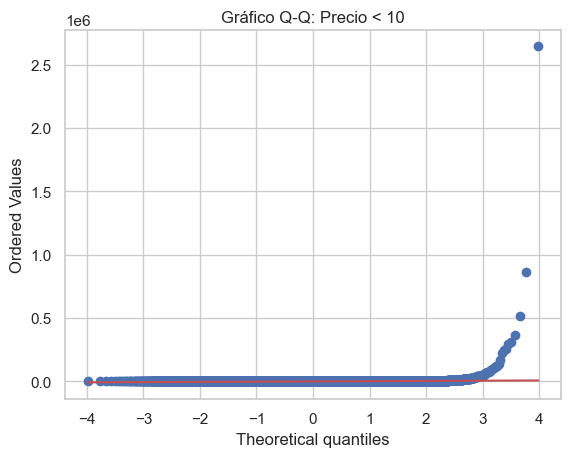

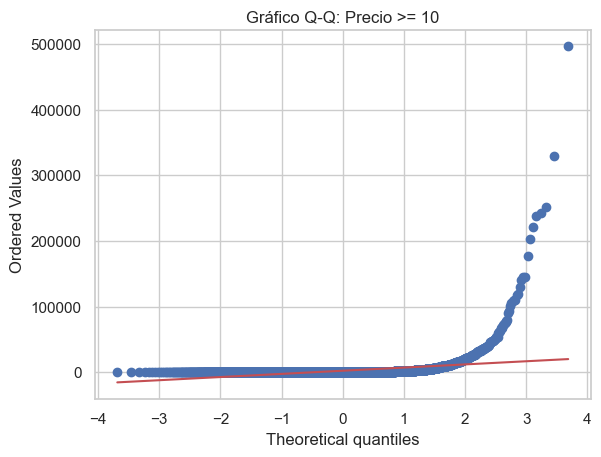

In [6]:
# Visualización (gráficos Q-Q)
sns.set(style="whitegrid")
for group, label in zip([ratings_group1, ratings_group2], ['Precio < 10', 'Precio >= 10']):
    stats.probplot(group, dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q: {label}")
    plt.show()

In [7]:
# -------------------------------
# 2. Prueba de Hipótesis (Prueba T de Student)
# -------------------------------

print("\n=== PRUEBA DE HIPÓTESIS (T-TEST) ===")

# Comparar medias de calificaciones positivas según el precio del juego
stat, p = stats.ttest_ind(ratings_group1, ratings_group2, equal_var=False)  # Welch's T-test
print(f"t-Estadístico={stat:.4f}, p-valor={p:.4f}")

if p < 0.05:
    print("Se rechaza H0: Hay una diferencia significativa en las medias entre los grupos.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para concluir que las medias difieren.")



=== PRUEBA DE HIPÓTESIS (T-TEST) ===
t-Estadístico=-7.2902, p-valor=0.0000
Se rechaza H0: Hay una diferencia significativa en las medias entre los grupos.


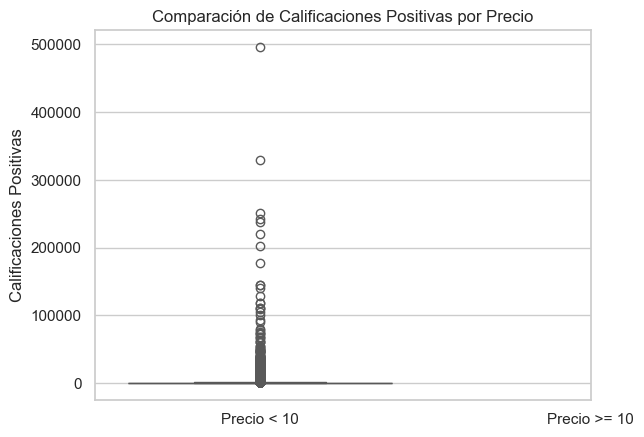

In [8]:
# Visualización de las medias
sns.boxplot(data=[ratings_group1, ratings_group2], palette="Set2")
plt.xticks([0, 1], ['Precio < 10', 'Precio >= 10'])
plt.title("Comparación de Calificaciones Positivas por Precio")
plt.ylabel("Calificaciones Positivas")
plt.show()

In [9]:
# -------------------------------
# 3. Prueba de Correlación
# -------------------------------

print("\n=== PRUEBA DE CORRELACIÓN ===")

# Calcular correlación entre precio y calificaciones positivas
correlation, p = stats.pearsonr(df['price'], df['positive_ratings'])
print(f"Correlación (Pearson): Coeficiente={correlation:.4f}, p-valor={p:.4f}")

if p < 0.05:
    print("Se rechaza H0: Existe una correlación significativa entre precio y calificaciones positivas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para una correlación significativa.")


=== PRUEBA DE CORRELACIÓN ===
Correlación (Pearson): Coeficiente=0.0361, p-valor=0.0000
Se rechaza H0: Existe una correlación significativa entre precio y calificaciones positivas.


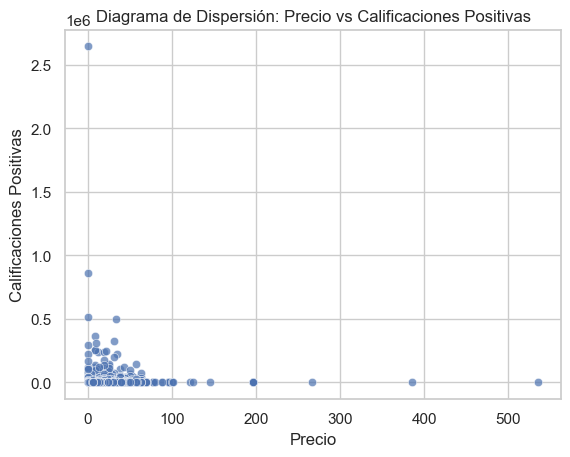

In [10]:
# Visualización de dispersión
sns.scatterplot(data=df, x='price', y='positive_ratings', alpha=0.7)
plt.title("Diagrama de Dispersión: Precio vs Calificaciones Positivas")
plt.xlabel("Precio")
plt.ylabel("Calificaciones Positivas")
plt.show()

In [11]:
# -------------------------------
# 4. Pruebas de Significancia (Chi-cuadrado)
# -------------------------------

print("\n=== PRUEBA CHI-CUADRADO ===")

# Crear una tabla de contingencia para plataformas
platforms_counts = df['platforms'].str.get_dummies(sep=',').sum().nlargest(2)
observed = np.array([platforms_counts.values])
expected = np.mean(observed) * np.ones_like(observed)

# Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency([platforms_counts.values])
print(f"Chi-cuadrado: Estadístico={chi2:.4f}, p-valor={p:.4f}, Grados de Libertad={dof}")

if p < 0.05:
    print("Se rechaza H0: Existe una asociación significativa entre las plataformas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para una asociación significativa.")



=== PRUEBA CHI-CUADRADO ===
Chi-cuadrado: Estadístico=0.0000, p-valor=1.0000, Grados de Libertad=0
No se rechaza H0: No hay evidencia suficiente para una asociación significativa.


### otro ejemplo: 

In [12]:
# Limpiar datos faltantes
df = df.dropna(subset=['positive_ratings', 'platforms'])

In [13]:
# Crear grupos de datos etiquetados (por ejemplo, las 25 plataformas mas comunes)
top_platforms = df['platforms'].str.get_dummies(sep=',').sum().nlargest(25).index
df['main_platform'] = df['platforms'].apply(
    lambda x: next((platform for platform in top_platforms if platform in x), 'Other')
)

# Agrupar datos por las plataformas principales
groups = [df[df['main_platform'] == platform]['positive_ratings'] for platform in top_platforms]

=== PRUEBA ANOVA ===
F-Estadístico=nan, p-valor=nan
No se rechaza H0: No hay evidencia suficiente para diferencias significativas entre las plataformas.


C:\Users\Acer\AppData\Local\Temp\ipykernel_15380\3944082369.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


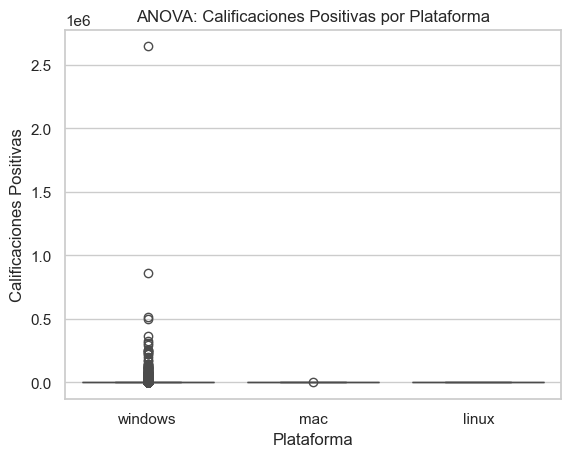

In [14]:
# ---------------------------------
# 5 Prueba ANOVA
# ---------------------------------
print("=== PRUEBA ANOVA ===")

# Ejecutar ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-Estadístico={f_stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza H0: Hay una diferencia significativa en las medias entre las plataformas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para diferencias significativas entre las plataformas.")

# Visualización ANOVA
sns.boxplot(data=df, x='main_platform', y='positive_ratings')
plt.title("ANOVA: Calificaciones Positivas por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Calificaciones Positivas")
plt.show()



=== PRUEBA DE KRUSKAL-WALLIS ===
H-Estadístico=nan, p-valor=nan
No se rechaza H0: No hay evidencia suficiente para diferencias significativas en la distribución.


C:\Users\Acer\AppData\Local\Temp\ipykernel_15380\3587854453.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = stats.kruskal(*groups)


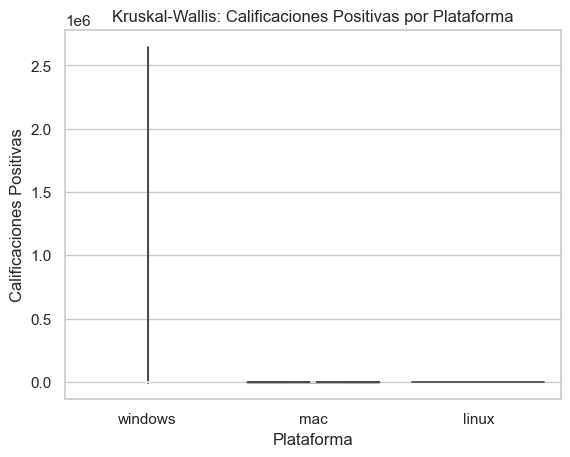

In [15]:
# ---------------------------------
# 6 Prueba de Kruskal-Wallis
# ---------------------------------
print("\n=== PRUEBA DE KRUSKAL-WALLIS ===")

# Ejecutar Kruskal-Wallis
h_stat, p_value = stats.kruskal(*groups)
print(f"H-Estadístico={h_stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza H0: Hay una diferencia significativa en la distribución de las calificaciones entre las plataformas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para diferencias significativas en la distribución.")

# Visualización Kruskal-Wallis (gráfico de violín)
sns.violinplot(data=df, x='main_platform', y='positive_ratings')
plt.title("Kruskal-Wallis: Calificaciones Positivas por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Calificaciones Positivas")
plt.show()